In [170]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

Решаем задачу о предсказании пола спортсмена

In [261]:
data = pd.read_csv('C:/Users/Администратор/Desktop/Netology/Data Science/лекции/5 -/adult.csv', sep=',',
                  encoding='utf8') # датасет - https://www.kaggle.com/rio2016/olympic-games
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Среди мужчин больше тех, кто зарабатывает больше, чем среди женщин

<AxesSubplot:>

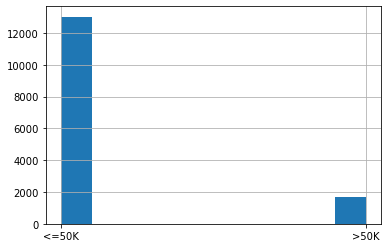

In [260]:
data['income'][data['gender']=='Female'].hist()

<AxesSubplot:>

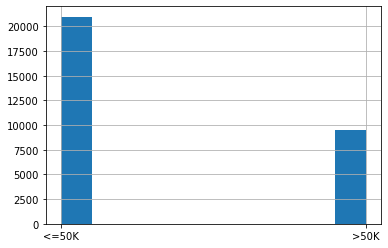

In [259]:
data['income'][data['gender']=='Male'].hist()

In [178]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Пропущенные значения обозначены знаком "?"

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Посчитаем количество пропусков в колонках

In [207]:
m=[]
for x in data.columns:
    if data[x][data[x]=='?'].count()>0:
        m.append(x)
    print( x, data[x][data[x]=='?'].count())

age 0
workclass 2799
fnlwgt 0
education 0
educational-num 0
marital-status 0
occupation 2809
relationship 0
race 0
gender 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 857
income 0


In [210]:
# посмотрим, какие уникальные значения содержатся в этих столбцах
for x in m:
    print( x, data[x].value_counts())

workclass Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
occupation Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
native-country United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                

In [202]:
#имеются пропущенные значения в полях  native-country,  workclass, occupation
# тк данных достаточно - удалим строки, в которых есть пропуски

In [262]:
data = data[(data['workclass']!='?') & (data['occupation']!='?') & (data['native-country']!='?')]

In [263]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [266]:
# выберем столбцы для обучения
X = ['age', 'workclass', 'education', 'educational-num', 'gender',
      'relationship', 'race', 'hours-per-week', 'native-country']

In [267]:
data_ = pd.get_dummies(data[X]) ## 
# переведем категориальные переменные в значения 0 и 1, добавив столбцы с соответствующими названиями
data_.head()

,age,educational-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,50,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,30,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


In [269]:
le = LabelEncoder()

In [270]:
y = pd.Series(le.fit_transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [271]:
x_train, x_test, y_train, y_test = train_test_split(data_, y, test_size = 0.2)

In [272]:
model1 = make_pipeline(StandardScaler(), LogisticRegression())

In [273]:
model2 = make_pipeline(StandardScaler(), SVC())

In [274]:
model1.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [275]:
model1.score( x_train, y_train)

0.8241700527959753

In [276]:
model1.score( x_test, y_test)

0.8247650635710337

In [277]:
from sklearn.metrics import f1_score

In [278]:
f1_score(model1.predict(x_test), y_test)

0.600856207504407

In [279]:
f1_score(model1.predict(x_train), y_train)

0.5975833491491112

In [280]:
model2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [281]:
f1_score(model2.predict(x_train), y_train)

0.583986820428336

In [243]:
f1_score(model2.predict(x_test), y_test)

0.5658278145695365

In [282]:
model2.score( x_test, y_test)

0.8224433388612493

In [283]:
model2.score( x_train, y_train)

0.8254968626475385

Загрузили данные, провели анализ данных: какие есть столбцы, сколько в них строк, какие есть пропуски, сколько пропусков

Удалили пропуски.
Преобразовали категориальные признаки. Разделили данные на обучающее и тестовое подмножество (20%).
Обучили модели логистической регрессии и опорных векторов на обучающем множестве.
Для тестового множества предсказали уровень дохода и сравнили с истинным значением, посчитав точность предсказания моделей
при помощи функции score. 

По результатам score - логистическая регрессия показывает лучший результат, чем SVM